In [1]:
# Samantha Yin 
# 1004194258
# Assignment 3

%pip install pingouin

  Using cached pingouin-0.5.4-py2.py3-none-any.whl.metadata (1.1 kB)
  Using cached pandas_flavor-0.6.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached pingouin-0.5.4-py2.py3-none-any.whl (198 kB)
Using cached pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import the library

# Import the numpy library
import numpy as np  
# Import the pandas library
import pandas as pd
# Import the matplotlib.pyplot library for data visualization
import matplotlib.pyplot as plt
# Import statsmodels.api
import statsmodels.api as sm
# Import the seaborn
import seaborn as sns
# Import ols
from statsmodels.formula.api import ols
from pingouin import ancova
from scipy import stats

In [3]:
## import the data 

# load the dataset using pandas and store it in the varaible "data"
data = pd.read_csv('INF2178_A3_data.csv')
# call the first 5 rows for reference 
data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [4]:
#Display the info of data to understand the data type and information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [5]:
# Display the summary of statistics for each column
# with count, mean, sd, min, 25% percentile, median, 75% percentile, max, sd of the date and numerical columns
data.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000


In [6]:
# Calculate the change

# Calculate the change in reading scores
data['change_in_reading'] = data['springreadingscore'] - data['fallreadingscore']

# Calculate the change in math scores
data['change_in_math'] = data['springmathscore'] - data['fallmathscore']

# Print the summary of statistics of the 2 new variables
print(data['change_in_reading'].describe())
print("\n")
print(data['change_in_math'].describe())

count    11933.000000
mean        11.556963
std          8.085004
min        -44.760000
25%          6.470000
50%         10.400000
75%         15.150000
max         91.940000
Name: change_in_reading, dtype: float64


count    11933.000000
mean        10.671218
std          6.855263
min        -22.160000
25%          6.010000
50%          9.860000
75%         14.330000
max         75.350000
Name: change_in_math, dtype: float64


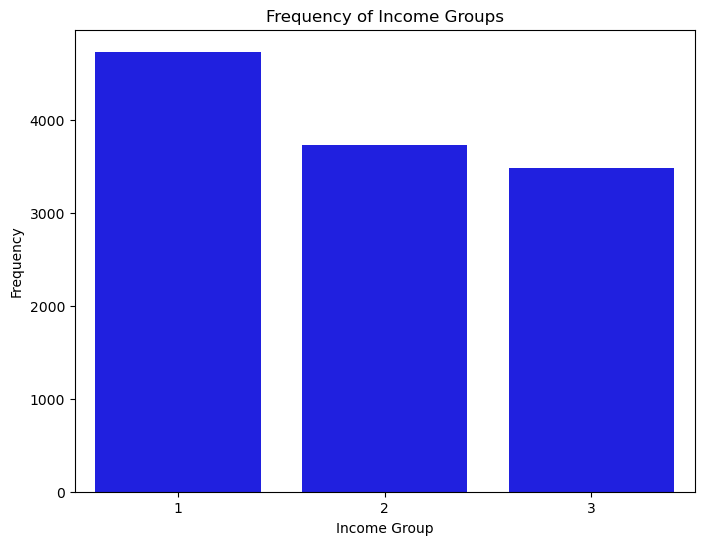

In [7]:
# Create a bar plot of income group
# Plot 'incomegroup' with colour blue and arrange the bars by their frequency
plt.figure(figsize=(8, 6))  # Set the figure size as needed
# plot with 'incomegroup' with colout blue
sns.countplot(x='incomegroup', data=data, color='blue',
              order=data['incomegroup'].value_counts().index)
# give the histogram a title
plt.title('Frequency of Income Groups')
# label x-axis
plt.xlabel('Income Group')
# label y-axis
plt.ylabel('Frequency')
plt.show()

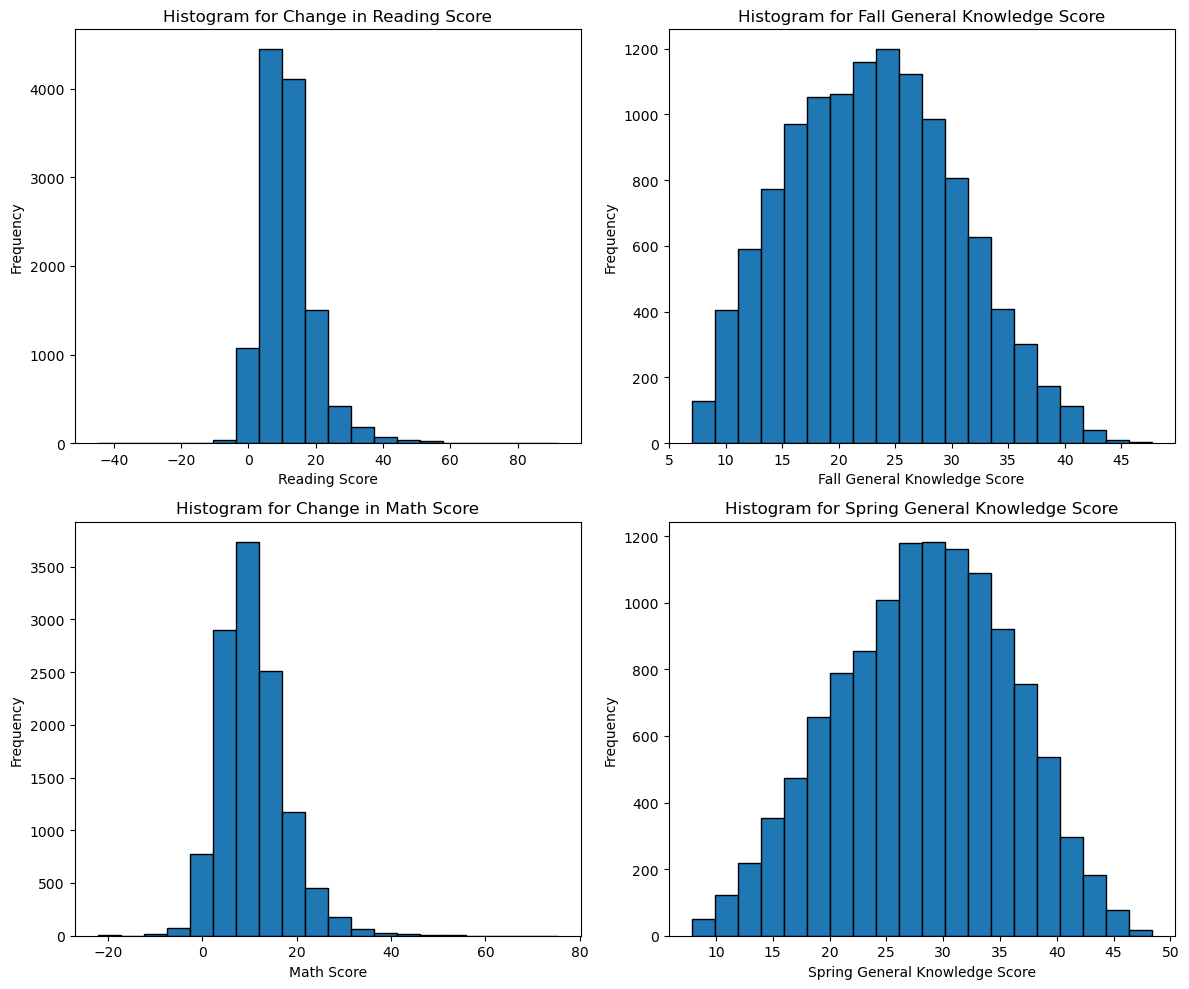

In [8]:
# Set up the plot with a specific size
plt.figure(figsize=(12, 10))

# Histogram for 'change_in_reading'
# arranges multiple plots in a 2x2 grid and at the first position
plt.subplot(2, 2, 1)   
# plot for 'change_in_reading' with 20 bins and black edges
plt.hist(data['change_in_reading'], bins=20, edgecolor='black') 
# give the histogram a title
plt.title('Histogram for Change in Reading Score')
# label x-axis
plt.xlabel('Reading Score')
# label y-axis
plt.ylabel('Frequency')

# Histogram for 'change_in_math'
# arranges multiple plots in a 2x2 grid and at the third position
plt.subplot(2, 2, 3)
# plot for 'change_in_' with 20 bins and black edges
plt.hist(data['change_in_math'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('Histogram for Change in Math Score')
# label x-axis
plt.xlabel('Math Score')
# label y-axis
plt.ylabel('Frequency')

# Histogram for 'fallgeneralknowledgescore'
# arranges multiple plots in a 2x2 grid and at the second position
plt.subplot(2, 2, 2)
# plot for 'fallgeneralknowledgescore' with 20 bins and black edges
plt.hist(data['fallgeneralknowledgescore'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('Histogram for Fall General Knowledge Score')
# label x-axis
plt.xlabel('Fall General Knowledge Score')
# label y-axis
plt.ylabel('Frequency')

# Histogram for 'springgeneralknowledgescore'
# arranges multiple plots in a 2x2 grid and at the fourth position
plt.subplot(2, 2, 4)
# plot for 'springgeneralknowledgescore' with 20 bins and black edges
plt.hist(data['springgeneralknowledgescore'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('Histogram for Spring General Knowledge Score')
# label x-axis
plt.xlabel('Spring General Knowledge Score')
# label y-axis
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


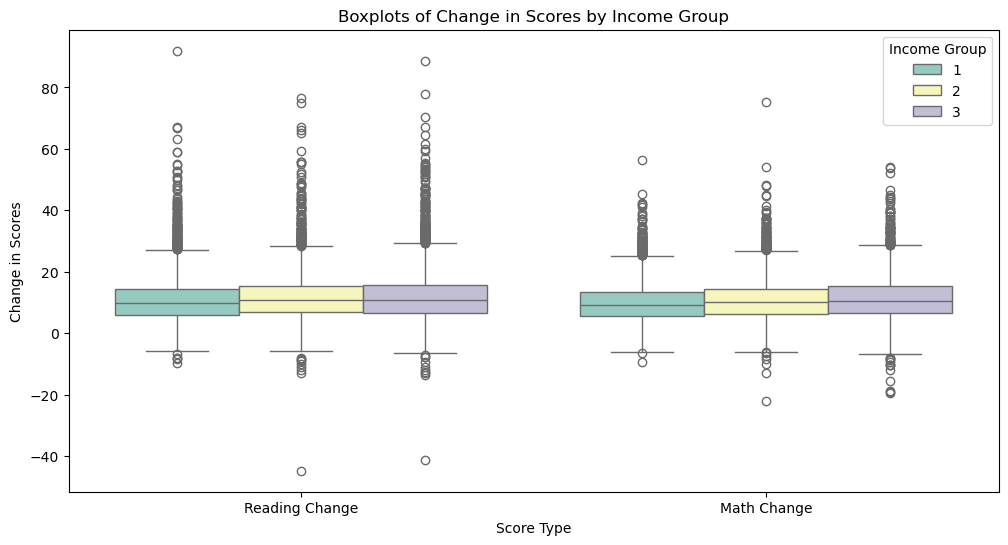

In [9]:
# Melt the modified dataframe to long format for easier plotting with seaborn
data_melt_changes = data.melt(value_vars=['change_in_reading', 'change_in_math'],
                              id_vars='incomegroup',
                              var_name='Score Type',
                              value_name='Score Change')

# Map the score types to more readable names
score_type_mapping_changes = {
    'change_in_reading': 'Reading Change',
    'change_in_math': 'Math Change'
}
# changes the score type names for clarity
data_melt_changes['Score Type'] = data_melt_changes['Score Type'].map(score_type_mapping_changes)

# Create a single plot with specific size
plt.figure(figsize=(12, 6))
# plot with 'Score Type' and 'Score Change',  with hue as 'incomegroup'
sns.boxplot(x='Score Type', y='Score Change', hue='incomegroup', data=data_melt_changes, palette='Set3')
# Give the plot a title
plt.title('Boxplots of Change in Scores by Income Group')
# label x-axis
plt.xlabel('Score Type')
# label y-axis
plt.ylabel('Change in Scores')
# lable the legend
plt.legend(title='Income Group')

plt.show()

In [10]:
# Define the data for ANCOVA with covariate fallgeneralknowledgescore, dependent change in reading score)
ancova(data=data, dv='change_in_reading',covar='fallgeneralknowledgescore',between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,287.485906,2,2.251247,1.053126e-01,0.000377
1,fallgeneralknowledgescore,14054.124684,1,220.110317,2.354473e-49,0.018117
2,Residual,761671.036393,11929,NaN,NaN,NaN


In [11]:
# Perform ANCOVA for change in reading scores with fallgeneralknowledgescore and income group
model_change_reading1 = ols('change_in_reading ~ fallgeneralknowledgescore + incomegroup', data=data).fit()

print(model_change_reading1.summary())

                            OLS Regression Results                            
Dep. Variable:      change_in_reading   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     143.2
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           3.35e-62
Time:                        16:31:37   Log-Likelihood:                -41730.
No. Observations:               11933   AIC:                         8.347e+04
Df Residuals:                   11930   BIC:                         8.349e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [12]:
# Perform ANCOVA for change in reading scores with interaction term
model_change_reading2 = ols('change_in_reading ~ fallgeneralknowledgescore * incomegroup', data=data).fit()
# Print the result
print(model_change_reading2.summary())

                            OLS Regression Results                            
Dep. Variable:      change_in_reading   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     102.8
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.10e-65
Time:                        16:31:37   Log-Likelihood:                -41720.
No. Observations:               11933   AIC:                         8.345e+04
Df Residuals:                   11929   BIC:                         8.348e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

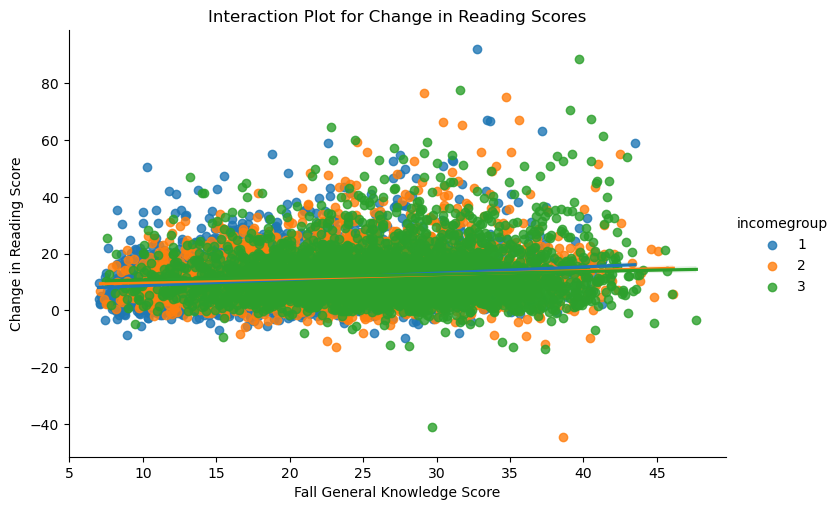

In [13]:
# Interaction plot for Reading
sns.lmplot(x='fallgeneralknowledgescore', y='change_in_reading', hue='incomegroup', data=data, aspect=1.5)
plt.title('Interaction Plot for Change in Reading Scores')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Change in Reading Score')

# Show the first plot and then create the second plot
plt.show()

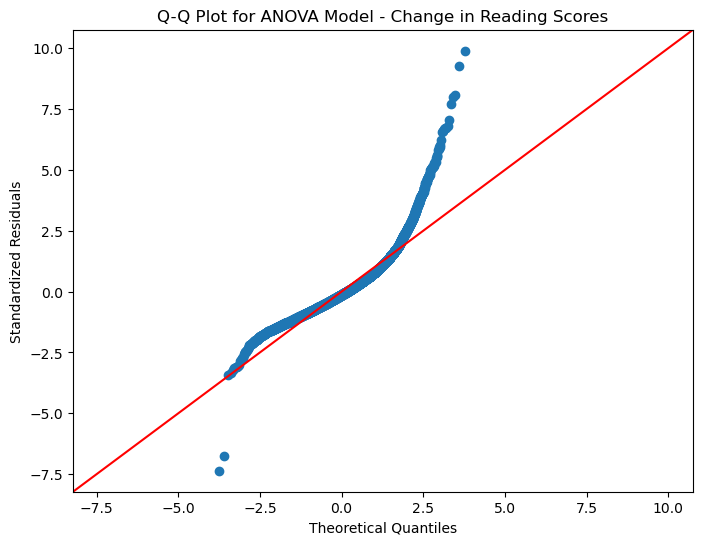

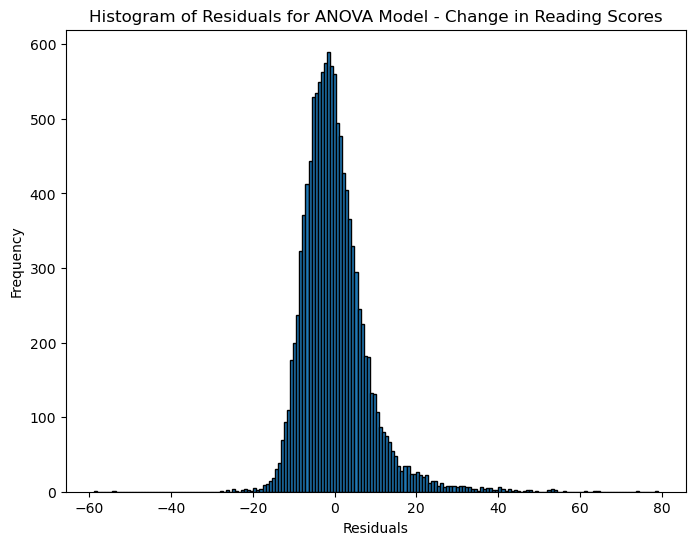

/opt/conda/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8996428847312927, pvalue=0.0)

In [14]:
# Checking Normality of residuals for the reading scores model

# Obtain the standardized residuals
reading_std_residuals = model_change_reading1.get_influence().resid_studentized_internal

# Q-Q plot to check the normality
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(reading_std_residuals, line='45', ax=ax)
ax.set_title('Q-Q Plot for ANOVA Model - Change in Reading Scores')
ax.set_xlabel("Theoretical Quantiles")     #x-axis label
ax.set_ylabel("Standardized Residuals")     #y-axis label
plt.show()

# Histogram of the residuals to visualize the residuals
plt.figure(figsize=(8, 6))
plt.hist(model_change_reading1.resid, bins='auto', histtype='bar', ec='k')
plt.title('Histogram of Residuals for ANOVA Model - Change in Reading Scores')
plt.xlabel("Residuals")     #x-axis label
plt.ylabel('Frequency')     #y-axis label
plt.show()

# Perform the Shapiro-Wilk test for normality
shapiro_reading = stats.shapiro(model_change_reading1.resid)
shapiro_reading


In [15]:
# Perform Levene's test for homogeneity of variances
levene_reading = stats.levene(data['change_in_reading'], data['incomegroup'])

# Return the result of Levene's test
levene_reading

LeveneResult(statistic=8559.392429441647, pvalue=0.0)

In [16]:
# Calculate the change in math scores
data['change_in_math'] = data['springmathscore'] - data['fallmathscore']

# Define the data for ANCOVA with covariate fallgeneralknowledgescore, dependent change in mathscore)
ancova(data=data, dv='change_in_math',covar='fallgeneralknowledgescore',between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,55.879616,2,0.624286,5.356614e-01,0.000105
1,fallgeneralknowledgescore,22425.932956,1,501.083959,9.425259e-109,0.040312
2,Residual,533880.499781,11929,NaN,NaN,NaN


In [17]:
# Perform ANCOVA for change in math scores
model_change_math1 = ols('change_in_math ~ fallgeneralknowledgescore + incomegroup', data=data).fit()

print(model_change_math1.summary())

                            OLS Regression Results                            
Dep. Variable:         change_in_math   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     299.9
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          8.33e-128
Time:                        16:31:39   Log-Likelihood:                -39610.
No. Observations:               11933   AIC:                         7.923e+04
Df Residuals:                   11930   BIC:                         7.925e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [18]:
# Perform ANCOVA for change in math scores with interaction term
model_change_math2 = ols('change_in_math ~ fallgeneralknowledgescore * incomegroup', data=data).fit()

print(model_change_math2.summary())

                            OLS Regression Results                            
Dep. Variable:         change_in_math   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     206.9
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          7.97e-131
Time:                        16:31:39   Log-Likelihood:                -39600.
No. Observations:               11933   AIC:                         7.921e+04
Df Residuals:                   11929   BIC:                         7.924e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

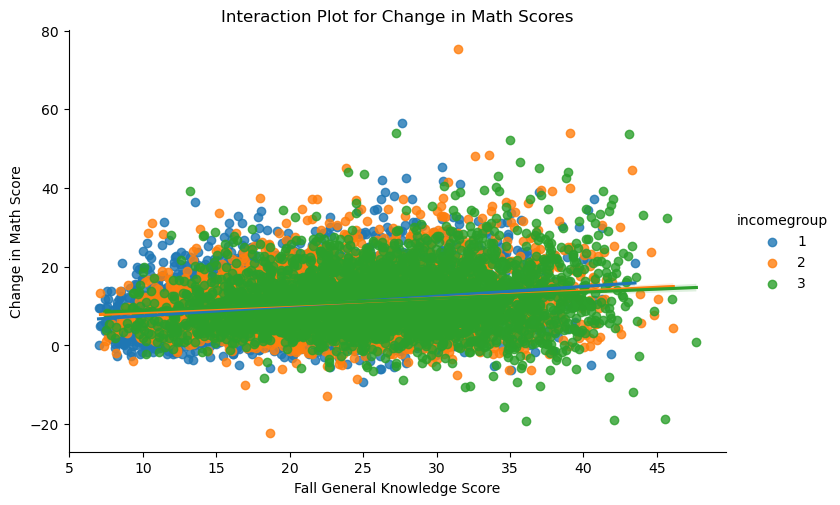

In [19]:
# Interaction plot for Math
sns.lmplot(x='fallgeneralknowledgescore', y='change_in_math', hue='incomegroup', data=data, aspect=1.5)
plt.title('Interaction Plot for Change in Math Scores')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Change in Math Score')

# Show the first plot and then create the second plot
plt.show()

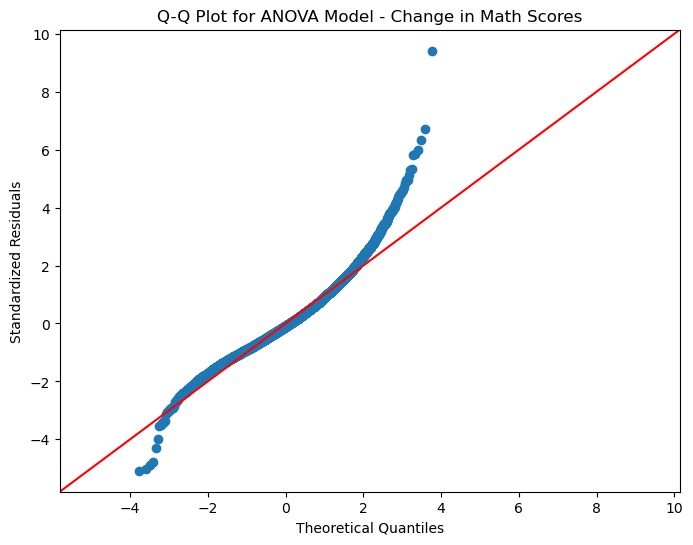

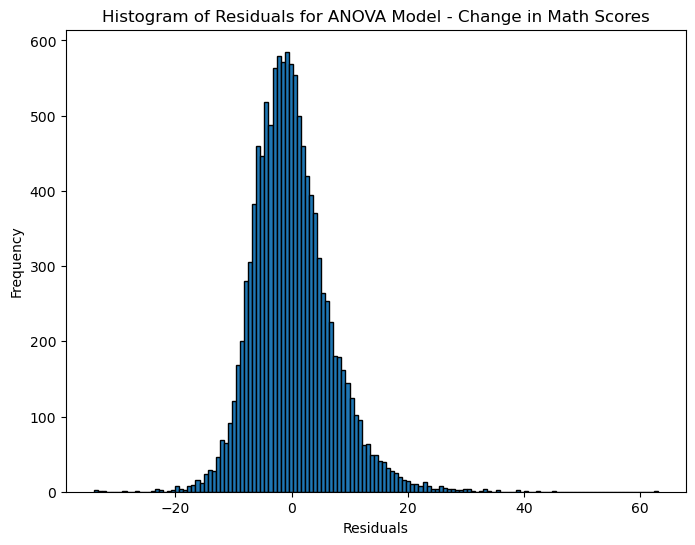

/opt/conda/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9664106965065002, pvalue=0.0)

In [20]:
# Checking Normality of residuals for the math scores model

# Obtain the standardized residuals
math_std_residuals = model_change_math1.get_influence().resid_studentized_internal

# Q-Q plot to check the normality of the residuals
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(math_std_residuals, line='45', ax=ax)
ax.set_title('Q-Q Plot for ANOVA Model - Change in Math Scores')
ax.set_xlabel("Theoretical Quantiles")   #x-axis label
ax.set_ylabel("Standardized Residuals")   #y-axis label
plt.show()

# Histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(model_change_math1.resid, bins='auto', histtype='bar', ec='k')
plt.title('Histogram of Residuals for ANOVA Model - Change in Math Scores')
plt.xlabel("Residuals")   #x-axis label
plt.ylabel('Frequency')   #y-axis label
plt.show()

# Perform the Shapiro-Wilk test for normality
shapiro_math = stats.shapiro(model_change_math1.resid)
shapiro_math

In [21]:
# Perform Levene's test for homogeneity of variances
levene_reading = stats.levene(data['change_in_math'], data['incomegroup'])

# Return the result of Levene's test
levene_reading

LeveneResult(statistic=11410.901718968345, pvalue=0.0)